<a href="https://colab.research.google.com/github/livig16/llm-foolery/blob/main/eco_tags_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Get the data from sample csv

In [ ]:
import pandas as pd

## sample records
sample_df = pd.read_csv('/content/drive/MyDrive/ml-takehome/test_frame.csv')
sample_df.head()


,id,created_at,url,name,origin_ecosystem,on_ecosystems,type,subtype,short_description,long_description,bubble_id
0,1327,2023-11-01 17:18:06.079585+00,https://michigansbdc.org/,Michigan SBDC - Capital Region,Detroit Mobility,"[""Pop Venture"",""Detroit Mobility""]",Organization,Resource Provider,The Michigan SBDC - Capital Region is a part o...,The Michigan SBDC - Capital Region is part of ...,1671035231352x444009994602059300
1,1319,2023-11-01 17:18:06.018505+00,https://www.capitalimpact.org/,Capital Impact Partners,Detroit Mobility,"[""Maryland Entrepreneur Hub"",""Black Butterfly ...",Organization,Resource Provider,Capital Impact Partners is a mission-driven c...,Capital Impact Partners is a mission-driven c...,1671033018957x801219475696085100
2,1425,2023-11-01 17:21:48.938841+00,https://annarborusa.org/events/,Upcoming Events | Ann Arbor SPARK,Detroit Mobility,"[""Detroit Mobility""]",Resource,Development Programs,Ann Arbor SPARK is an organization that suppor...,Ann Arbor SPARK is an organization that drives...,1695670728022x894921689693159400
3,1522,2023-11-01 17:24:20.305407+00,https://www.michigan.gov/mdot/business/local-g...,Bridge Program | MDOT,Detroit Mobility,"[""Detroit Mobility""]",Resource,Development Programs,The MDOT Bridge Program manages Michigan's loc...,The MDOT Bridge Program is a department within...,1698173629813x527631527792607200
4,1311,2023-11-01 17:14:49.202554+00,https://www.score.org/templates-resources?f%5B...,SCORE Small Business Resource Library,Detroit Mobility,"[""National"",""The Entrepreneurial Hub"",""USC/SoC...",Resource,Development Programs,The SCORE Small Business Resource Library is a...,The SCORE Small Business Resource Library is a...,1670970496818x687835215039099600


In [ ]:
## sample keys and paradigms (bigger range of ecosystems than sample records)

keys_df = pd.read_csv('/content/drive/MyDrive/ml-takehome/keywords_paradigms_test.csv')
keys_df.head()

,id,created_at,name,ecosystems,type,definition
0,11657,2023-08-30 19:26:45.884515+00,Immunology,"[""CO BioScience""]",Specialty/Clinical Indication,NaN
1,11627,2023-08-30 19:26:41.069576+00,Seeking out-licensing opportunities,"[""CO BioScience""]",Primary Licensing/Funding Objectives,NaN
2,11588,2023-08-30 19:26:33.630807+00,QMS Implementation,"[""CO BioScience""]",Industry,NaN
3,11618,2023-08-30 19:26:39.642381+00,Technology Transfer,"[""CO BioScience""]",Types of Emerging Company Support,NaN
4,11617,2023-08-30 19:26:39.481282+00,Seeking investment $5-10M,"[""CO BioScience""]",Primary Licensing/Funding Objectives,NaN


define the task:

Givens | Inputs:
- a standard "record" json object, made up of mostly descriptive data
- a given "ecosystem" of type str, a key which has the value of a nested list called a "paradigm"
- the corpus of paradigms for lookups

Overview of a "Paradigm":
- a paradigm is strucutred [kType{key, key, key, ...}, kType{key, key, key, ...}] where kType stands for "Keyword Type" -- a bucket/header/classifier/label that groups keywords
- each "paradigm" corresponds to an "ecosystem" , i.e. a given subset of the data in the sample db
- see image below for an understanding of how these keyword types act as "headers" that group keywords on a given record profile on this web platform https://baltimore.tech/resources



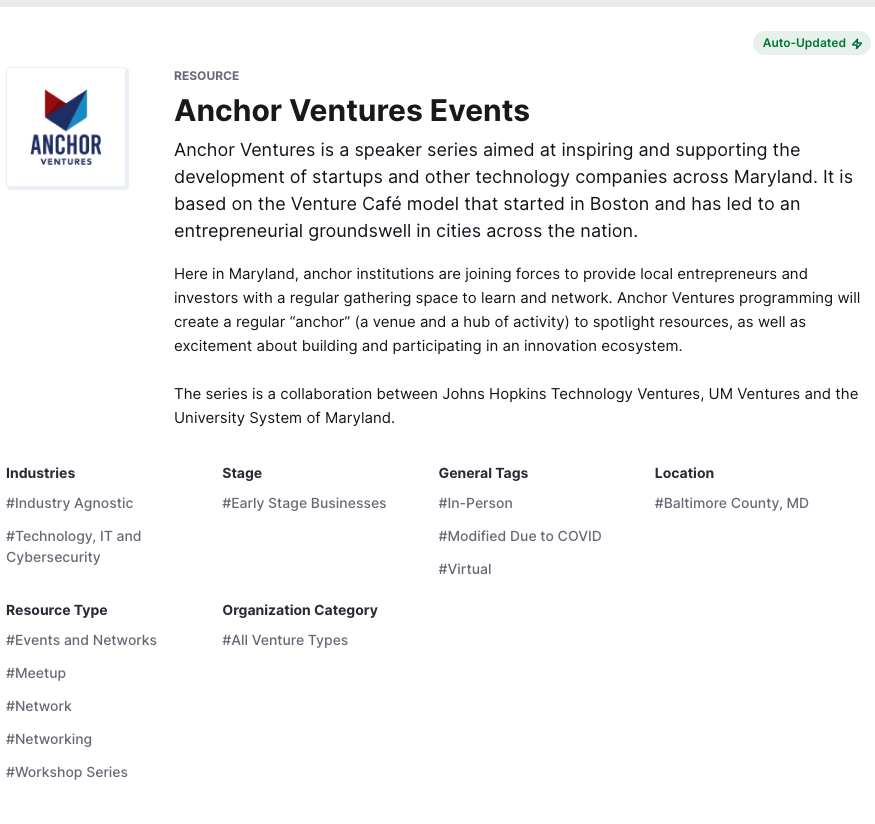

Your task:

- for a given record, design a function that generates accurate, relevant keywords given any paradigm (i.e. given any option set of keywords)
- the design must be agnostic enough it could work for any ecosystem/paradigm (not just the subset of provided here), assuming the actual structs of these data abstractions remain relatively the same for all records / paradigms (in the real world, they don't always, but let's leave that aside for now)
- this just has to be some functional code (i.e. no deployment, simply python that can take in the data in this notebook and return a dataframe or json file)
- do document your code w/ comments just explaining your thought process / approach
- this code can lean on any NLP/ML heurisitcs you're familiar with, if you can do it w/o NLP/ML (that is, purely via some data science heuristics), even better!

In [ ]:
from itertools import chain
from ast import literal_eval

## load to list of dictionaries for easy list comp
keys_as_dict = keys_df.to_dict(orient='records')

## fix stringification of ecosystems k,v pairs
for key in keys_as_dict:
  key['ecosystems'] = literal_eval(key['ecosystems'])

#print(f"{keys_as_dict[:5]}")

## Set of Keyword Types and Set of Ecosystems in this keywords dataset
kTypes = set([item.get('type') for item in keys_as_dict if type(item.get('type')) == str])
ecosystems = set(chain.from_iterable([item.get('ecosystems') for item in keys_as_dict]))

print(f"key types: {kTypes}\n ecosystems: {ecosystems}")
keys_df.head()

key types: {'Organization Category', 'Specialty/Clinical Indication', 'Types of Medical Devices', 'Types of Community Development Orgs', 'Scope of Work', 'Stage', 'Position/Title', 'Skills', 'Types of Laboratory Testing', 'Company Development Phase', 'Individual Functions', 'Target Capital Raise', 'Audience', 'Types of BioTech Therapeutics and Diagnostics', 'Types of Life Science Companies', 'Types of Funding Sources', 'Products and Services', 'Primary Licensing/Funding Objectives', 'Types of Research and Education Institutions', 'Industry', 'Organization Functions', 'Regulatory Class', 'Offerings', 'Types of Pharmaceutical Therapies', 'Types of Animal Healthcare', 'Types of Emerging Company Support', 'Registration Status', 'Types of AgBio', 'Types of Combination Products', 'Industries', 'Types of Point of Care Testing', 'Goals', 'Certifications', 'Ownership', 'General Tags', 'Job Positions', 'Resource Type', 'Types of Medical Technology', 'Types of Life Sciences Tools', 'Job Type'}
 e

,id,created_at,name,ecosystems,type,definition
0,11657,2023-08-30 19:26:45.884515+00,Immunology,"[""CO BioScience""]",Specialty/Clinical Indication,NaN
1,11627,2023-08-30 19:26:41.069576+00,Seeking out-licensing opportunities,"[""CO BioScience""]",Primary Licensing/Funding Objectives,NaN
2,11588,2023-08-30 19:26:33.630807+00,QMS Implementation,"[""CO BioScience""]",Industry,NaN
3,11618,2023-08-30 19:26:39.642381+00,Technology Transfer,"[""CO BioScience""]",Types of Emerging Company Support,NaN
4,11617,2023-08-30 19:26:39.481282+00,Seeking investment $5-10M,"[""CO BioScience""]",Primary Licensing/Funding Objectives,NaN


In [ ]:
!pip install yake sentence_transformers torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.6 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=75449848b164bcbd3aff240837743cfbda3790dfbc4f301a6ab6398b3246cbb5
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


In [ ]:
import torch

from sentence_transformers import SentenceTransformer
from sentence_transformers.util import cos_sim

In [ ]:
model = SentenceTransformer("thenlper/gte-small")   # probably best pretrained option

# Send model to CUDA device
device = torch.device("cuda")
model.to(device)

.gitattributes:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/68.1k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/583 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/66.7M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/66.8M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

SentenceTransformer(
  (0): Transformer({'max_seq_length': 512, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  (2): Normalize()
)

### Messing around with the model
Thoughts on NLP and word vectors:
* From what I had read about more sophisticated NLP vs. word vector encodings such as Word2Vec, advanced NLP is reliant on context to understand meaning and may not do as good a job of analyzing isolated words. For this reason I considered either separating out isolated words from the descriptive posts and vectorizing them, or hydrating text templates with the keyword tags to add additional context.
* Separation & vectorization risked losing context from descriptive text, which worried me because of what I'm going to call the "not in Boston anymore" (NIBA) problem, based on the screenshot example where Boston is mentioned but is not the location of the specific event. Implementing a fix like taking a majority vote of location tags seemed likely, but not always guranteed, to fix the problem.
* Below, I tried cos_sim on a number of different sentence and tag combos with more or less context (i.e. (based in) Boston/Maryland) and it seemed as if adding more context to the keywords didn't make much of a difference in fixing the NIBA problem.

Silly ad-hoc optimizers:
* 'Maryland to moved since has but Boston in started': Idea to fix to some instances of the NIBA problem, based on how transformers' self attention to prior inputs causes words earlier in a sequence have a greater effect on encoded meaning. If a phrase has a contrasting subordinating conjunction, reverse the order of the words. It sort of worked below, and at least did better job than adding context to keywords! I didn't put it in my actual solution, because due to the word jumbling I worried there would be instances where it did more harm than good.
* At the bottom of the examples list are a few examples where adding a few keywords from a list of ktypes helped the model better identify relevant categories. This one made a certain amount of intuitive sense, and seemed to have relatively little potential for reducing accuracy in certain cases, so I did incorporate it into my solution code.

In [ ]:
from itertools import chain
import numpy as np

sentence_tags_test = [  ['That is a happy person', 'That is a joyful person'],
                        ['That is a happy person', 'happy'],
                        ['That is a happy person', 'joyful'],
                        ['happy', 'joyful'],

                        ['That is a happy person', 'That is a sad person'],
                        ['That is a happy person', 'sad'],
                        ['happy', 'sad'],

                        ['She was sad but seems happier', 'happy'],
                        ['She was sad but seems happier', 'happier'],
                        ['She was sad but seems happier', 'joyful'],
                        ['She was sad but seems happier', 'sad'],

                        ['started in Boston but has since moved to Maryland', 'Boston'],
                        ['started in Boston but has since moved to Maryland', 'Maryland'],
                        ['Maryland to moved since has but Boston in started', 'Boston'],
                        ['Maryland to moved since has but Boston in started', 'Maryland'],
                        ['started in Boston but has since moved to Maryland', 'based in Boston'],
                        ['started in Boston but has since moved to Maryland', 'based in Maryland'],

                        ['started in Boston but has since moved to Maryland', 'location'],
                        ['started in Boston but has since moved to Maryland', 'industry'],
                        ['started in Boston but has since moved to Maryland', 'location New York Chicago IL Washington DC'],
                        ['started in Boston but has since moved to Maryland', 'industry Technology IT Manufacturing Retail'],
                        ['started in Boston but has since moved to Maryland', 'New York Chicago IL Washington DC'],
                        ['started in Boston but has since moved to Maryland', 'Technology IT Manufacturing Retail']
]

test_examples = np.ravel(sentence_tags_test)

model = SentenceTransformer('thenlper/gte-small')
embeddings = model.encode(test_examples)

for i in range(0, len(test_examples), 2):  # step=2
  print(f"{test_examples[i]}, {test_examples[i+1]}: {cos_sim(embeddings[i], embeddings[i+1])}")


That is a happy person, That is a joyful person: tensor([[0.9671]])
That is a happy person, happy: tensor([[0.9037]])
That is a happy person, joyful: tensor([[0.8563]])
happy, joyful: tensor([[0.8794]])
That is a happy person, That is a sad person: tensor([[0.8983]])
That is a happy person, sad: tensor([[0.8002]])
happy, sad: tensor([[0.8527]])
She was sad but seems happier, happy: tensor([[0.8432]])
She was sad but seems happier, happier: tensor([[0.8704]])
She was sad but seems happier, joyful: tensor([[0.8128]])
She was sad but seems happier, sad: tensor([[0.8695]])
started in Boston but has since moved to Maryland, Boston: tensor([[0.9033]])
started in Boston but has since moved to Maryland, Maryland: tensor([[0.8870]])
Maryland to moved since has but Boston in started, Boston: tensor([[0.8701]])
Maryland to moved since has but Boston in started, Maryland: tensor([[0.8860]])
started in Boston but has since moved to Maryland, based in Boston: tensor([[0.9069]])
started in Boston but

### Making nested dict for ecosystems
Structure is
{ecosystem1 : {kType1:[key1, key2,...] , kType2:[key1, key2,...]} , ecosystem2 : {...} , ... }

There is a corresponding dict which has the same ecosystem and ktype keys, but where the keyword tags are all embedded. I, too, am dissatisfied with the method I used to construct it.

In [ ]:
#model = SentenceTransformer('thenlper/gte-small')

# initialize nested dict
nest_ecos_dict = {eco: {} for eco in ecosystems}
emb_nest_dict = {eco: {} for eco in ecosystems}
for key in keys_as_dict:
  ktype = key['type']
  for eco in key['ecosystems']:
    nest_ecos_dict[eco][ktype] = []
    emb_nest_dict[eco][ktype] = []



# fill nested dict with key names
for key in keys_as_dict:
  kname = key['name']
  ktype = key['type']
  for eco in key['ecosystems']:
    if kname not in nest_ecos_dict[eco][ktype]:
      nest_ecos_dict[eco][ktype].append(kname)
      emb_nest_dict[eco][ktype].append(model.encode(kname)) #try to do this better, like with a mapping function?  # might be slowed down by nANs?


### The big boy
phrase_tagging (the function defined below) takes in a list of strings, the name of an ecosystem as a string, and the optional parameters ktype_sim_min and key_sim_min (see comments just above the fn definition). It returns a dict of the form {kType:[keys], ...} containing as values all the keys which the function deems relevant to the text in phrase_list, organized according to their type.

First, text pieces are compared using cos_sim to keyword types with randomized additional keys for context; if they meet the minimum semantic similarity score then they are compared to all the keys in that category. High sim scoring keys are added to the list of their corresponding type in the dict that is returned when the function is complete.

In [ ]:
import random
import numpy as np

'''
phrase_list = ['It is a truth universally acknowledged', 'that a single man in possession of a good fortune','must be in want of a wife', 'My dear Mr. Bennet', 'said his lady to him one day', 'have you heard that Netherfield Park is let at last']
eco_dict = nest_ecos_dict['Indiana']
ktypes_context = [ktype+', '+', '.join(random.choices(eco_dict[ktype], k=min(len(eco_dict[ktype]),5))) for ktype in list(eco_dict.keys())]
print(f"{ktypes_context[:5]}")
emb_phrases = model.encode(phrase_list)
emb_ktypes = model.encode(ktypes_context)
sim_mat = cos_sim(emb_phrases,emb_ktypes)
print(f"{sim_mat}")

a=torch.tensor([[1,2],[6,9],[4,2]])
b=['potatoes','tomatoes','greens']
print(f"{np.array(a.argmax(1))}")
print(f"{(a.argmax(1)).numpy()}")
print(f"{a.argmax(1)}")
print(f"{[b[idx] for idx in a.argmax(1)]}")
'''
# ktype_sim_min, key_sim_min are the minimum cos_sim scores
# for a phrase to be classified as about a kType or relevant to a keyword tag, respectively.
def phrase_tagging(phrase_list, ecosystem_name=str, ktype_sim_min=0.8, key_sim_min=0.85):
  # get inner dicts corresponding to ecosystem_name from nested dicts created above
  eco_dict = nest_ecos_dict[ecosystem_name]
  emb_eco_dict = emb_nest_dict[ecosystem_name]

  # filter out incorrect data types or nAN
  phrase_list = [phrase for phrase in phrase_list if type(phrase)==str]
  ktype_list = [dict_key for dict_key in eco_dict.keys() if type(dict_key)==str]

  num_ktypes = len(ktype_list)
  num_phrases = len(phrase_list)

  # join each kType name with up to 5 random related keys -- this is Silly Ad-hoc Optimizer #2 from my essay up top
  ktypes_context = [ktype+', '+', '.join(random.choices(eco_dict[ktype], k=min(num_ktypes,5))) for ktype in ktype_list]

  # embed the list of text and the random context keyword strings from the prev. line
  emb_phrases = model.encode(phrase_list)
  emb_ktypes_context = model.encode(ktypes_context)

  # matrix of cos_sim scores corr. to emb_phrases as rows, emb_ktypes as columns
  ktype_sim_mat = cos_sim(emb_phrases,emb_ktypes_context)

  # list of indices of form (phrase, relevant ktype)
  phrase_ktype_indices = np.nonzero(ktype_sim_mat > ktype_sim_min)

  # have all text run through General Tags
  if 'General Tags' in ktype_list:
    gen_idx = ktype_list.index('General Tags')
    iter = ((i,gen_idx) for i in range(num_phrases))
    gen_idx_list = torch.tensor(np.fromiter(iter, dtype=np.dtype((int, 2))))
    phrase_ktype_indices = torch.cat((phrase_ktype_indices, gen_idx_list))

  # construct a dict of key lists related to the given phrase list
  relevant_keys_dict = {ktype: [] for ktype in ktype_list}
  for idx in phrase_ktype_indices:
    phrase = phrase_list[idx[0]]
    emb_phrase = emb_phrases[idx[0]]
    ktype_name = ktype_list[idx[1]]

    ktype_keys = eco_dict[ktype_name]
    emb_ktype_keys = emb_eco_dict[ktype_name]
    num_keys = len(ktype_keys)

    phrase_keyscores = cos_sim(emb_phrase,emb_ktype_keys).flatten()
    get_keys_indices = np.nonzero(phrase_keyscores > key_sim_min)
    keys_to_add = np.take(ktype_keys, get_keys_indices).flatten()
    for key in keys_to_add:
      if key not in relevant_keys_dict[ktype_name]:
        relevant_keys_dict[ktype_name].append(key)

  return relevant_keys_dict



### Main execution

Text processing on sample data

In [ ]:
## add list of sentence strings from short_desc and long_desc to sample_df as new col phrase_list
sample_df['phrase_list'] = (sample_df['short_description'].astype(str)+sample_df['long_description'].astype(str)).str.split('[!.:;?]')

#would be cool but would need to work out looping through ecosystems
#sample_df['relevant_keys_dict'] = phrase_tagging(sample_df['phrase_list'].str, )

sample_as_dict = sample_df.to_dict(orient='records')

# fix that stringification
for sample in sample_as_dict:
  sample['on_ecosystems'] = literal_eval(sample['on_ecosystems'])

Run the big boy function on all sample text/ecosystem pairs; save results as a new column in a copy of the sample dataframe

In [ ]:
keys_series = []
for sample in sample_as_dict:
  #print(f"{sample}")
  sample_keys = {}
  for ecosystem_name in sample['on_ecosystems']:
    #print(f"ecosystems: {ecosystems}")
    #print(f"{ecosystem_name}")
    if ecosystem_name in ecosystems:
      sample_keys.update(phrase_tagging(sample['phrase_list'], ecosystem_name))
  keys_series.append(sample_keys)

#print(f"relevant keys: {relevant_keys[:5]}")

sample_df_with_keys = sample_df.assign(keys_series=keys_series)

Done!

In [ ]:
sample_df_with_keys.head()

,id,created_at,url,name,origin_ecosystem,on_ecosystems,type,subtype,short_description,long_description,bubble_id,phrase_list,keys_series
0,1327,2023-11-01 17:18:06.079585+00,https://michigansbdc.org/,Michigan SBDC - Capital Region,Detroit Mobility,"[""Pop Venture"",""Detroit Mobility""]",Organization,Resource Provider,The Michigan SBDC - Capital Region is a part o...,The Michigan SBDC - Capital Region is part of ...,1671035231352x444009994602059300,[The Michigan SBDC - Capital Region is a part ...,"{'Resource Type': ['Accelerator', 'Workshop', ..."
1,1319,2023-11-01 17:18:06.018505+00,https://www.capitalimpact.org/,Capital Impact Partners,Detroit Mobility,"[""Maryland Entrepreneur Hub"",""Black Butterfly ...",Organization,Resource Provider,Capital Impact Partners is a mission-driven c...,Capital Impact Partners is a mission-driven c...,1671033018957x801219475696085100,[ Capital Impact Partners is a mission-driven ...,"{'Resource Type': ['Private Equity', 'Co-worki..."
2,1425,2023-11-01 17:21:48.938841+00,https://annarborusa.org/events/,Upcoming Events | Ann Arbor SPARK,Detroit Mobility,"[""Detroit Mobility""]",Resource,Development Programs,Ann Arbor SPARK is an organization that suppor...,Ann Arbor SPARK is an organization that drives...,1695670728022x894921689693159400,[Ann Arbor SPARK is an organization that suppo...,"{'Resource Type': ['Entrepreneurship Program',..."
3,1522,2023-11-01 17:24:20.305407+00,https://www.michigan.gov/mdot/business/local-g...,Bridge Program | MDOT,Detroit Mobility,"[""Detroit Mobility""]",Resource,Development Programs,The MDOT Bridge Program manages Michigan's loc...,The MDOT Bridge Program is a department within...,1698173629813x527631527792607200,[The MDOT Bridge Program manages Michigan's lo...,"{'Resource Type': ['Accelerator', 'Workshop', ..."
4,1311,2023-11-01 17:14:49.202554+00,https://www.score.org/templates-resources?f%5B...,SCORE Small Business Resource Library,Detroit Mobility,"[""National"",""The Entrepreneurial Hub"",""USC/SoC...",Resource,Development Programs,The SCORE Small Business Resource Library is a...,The SCORE Small Business Resource Library is a...,1670970496818x687835215039099600,[The SCORE Small Business Resource Library is ...,"{'Resource Type': ['Accelerator', 'Workshop', ..."


I did some plotting to decide on the default values for the minimum semantic similarity arguments. What ended up being more useful was just trial and error with small text samples.

In [ ]:
import matplotlib.pyplot as plt

'''
fig, axs = plt.subplots(2, 3, sharey=True, tight_layout=True)
print("check1")
# We can set the number of bins with the *bins* keyword argument.
n_bins = 15

axs[0][0].hist(keyscores[phrase_list[0]], bins=n_bins)
axs[0][1].hist(keyscores[phrase_list[1]], bins=n_bins)
axs[0][2].hist(keyscores[phrase_list[2]], bins=n_bins)
axs[1][0].hist(keyscores[phrase_list[3]], bins=n_bins)
axs[1][1].hist(keyscores[phrase_list[4]], bins=n_bins)
axs[1][2].hist(keyscores[phrase_list[5]], bins=n_bins)
'''

['The Michigan SBDC - Capital Region is part of the statewide network of the Michigan Small Business Development Center', ' Their mission is to support Michigan small businesses by offering free consulting services, tools, and resources', ' They provide expert guidance on various aspects of entrepreneurship, including market research, cybersecurity, export services, and growth strategies', ' They offer training and events, both live and on-demand, to help small business owners start, grow, and sell their businesses', ' Their team of experienced consultants provides personalized business coaching at no cost to the entrepreneurs', ' Whether you are just starting out or looking to sell your business, the Michigan SBDC - Capital Region is there to help you navigate the challenges and find success']
phrase:  Their mission is to support Michigan small businesses by offering free consulting services, tools, and resources
 ktype: Resource Type
num keys: 171
all keys: ['Mezzanine Financing', 'D

'\nfig, axs = plt.subplots(2, 3, sharey=True, tight_layout=True)\nprint("check1")\n# We can set the number of bins with the *bins* keyword argument.\nn_bins = 15\n\naxs[0][0].hist(keyscores[phrase_list[0]], bins=n_bins)\naxs[0][1].hist(keyscores[phrase_list[1]], bins=n_bins)\naxs[0][2].hist(keyscores[phrase_list[2]], bins=n_bins)\naxs[1][0].hist(keyscores[phrase_list[3]], bins=n_bins)\naxs[1][1].hist(keyscores[phrase_list[4]], bins=n_bins)\naxs[1][2].hist(keyscores[phrase_list[5]], bins=n_bins)\n'

* Having text samples get checked with kTypes first reduced the amount of compute that was necessary, especially since there are so many keys in each kType. One way I could vizualize this working without kType checking is to have keys of all types already mapped into a space, and then algorithmically searching for the nearest neighbors of a given text embedding (maybe using BSP?)
* Scaling up: Currently several parts of the program are running in sequence, so I'd want to parallelize both the phrase_tagging function and, of course, my least favorite dict construction. I have a few datatype checks in place; I suspect some leaks would present themselves with a larger dataset.
* If the splitting thresholds at the kType checks were variable, then it would be a kind of decision tree. Tf I was going to build and train a decision tree for this data sorting process, I'd want to add more branching between the kType nodes and the key leaf nodes, given how many keys are associated with some kTypes.